In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols #Summary statistics

In [5]:
data = pd.read_csv('Fitbit2.csv')

In [19]:
data.head(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,...,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,...,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,...,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,...,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


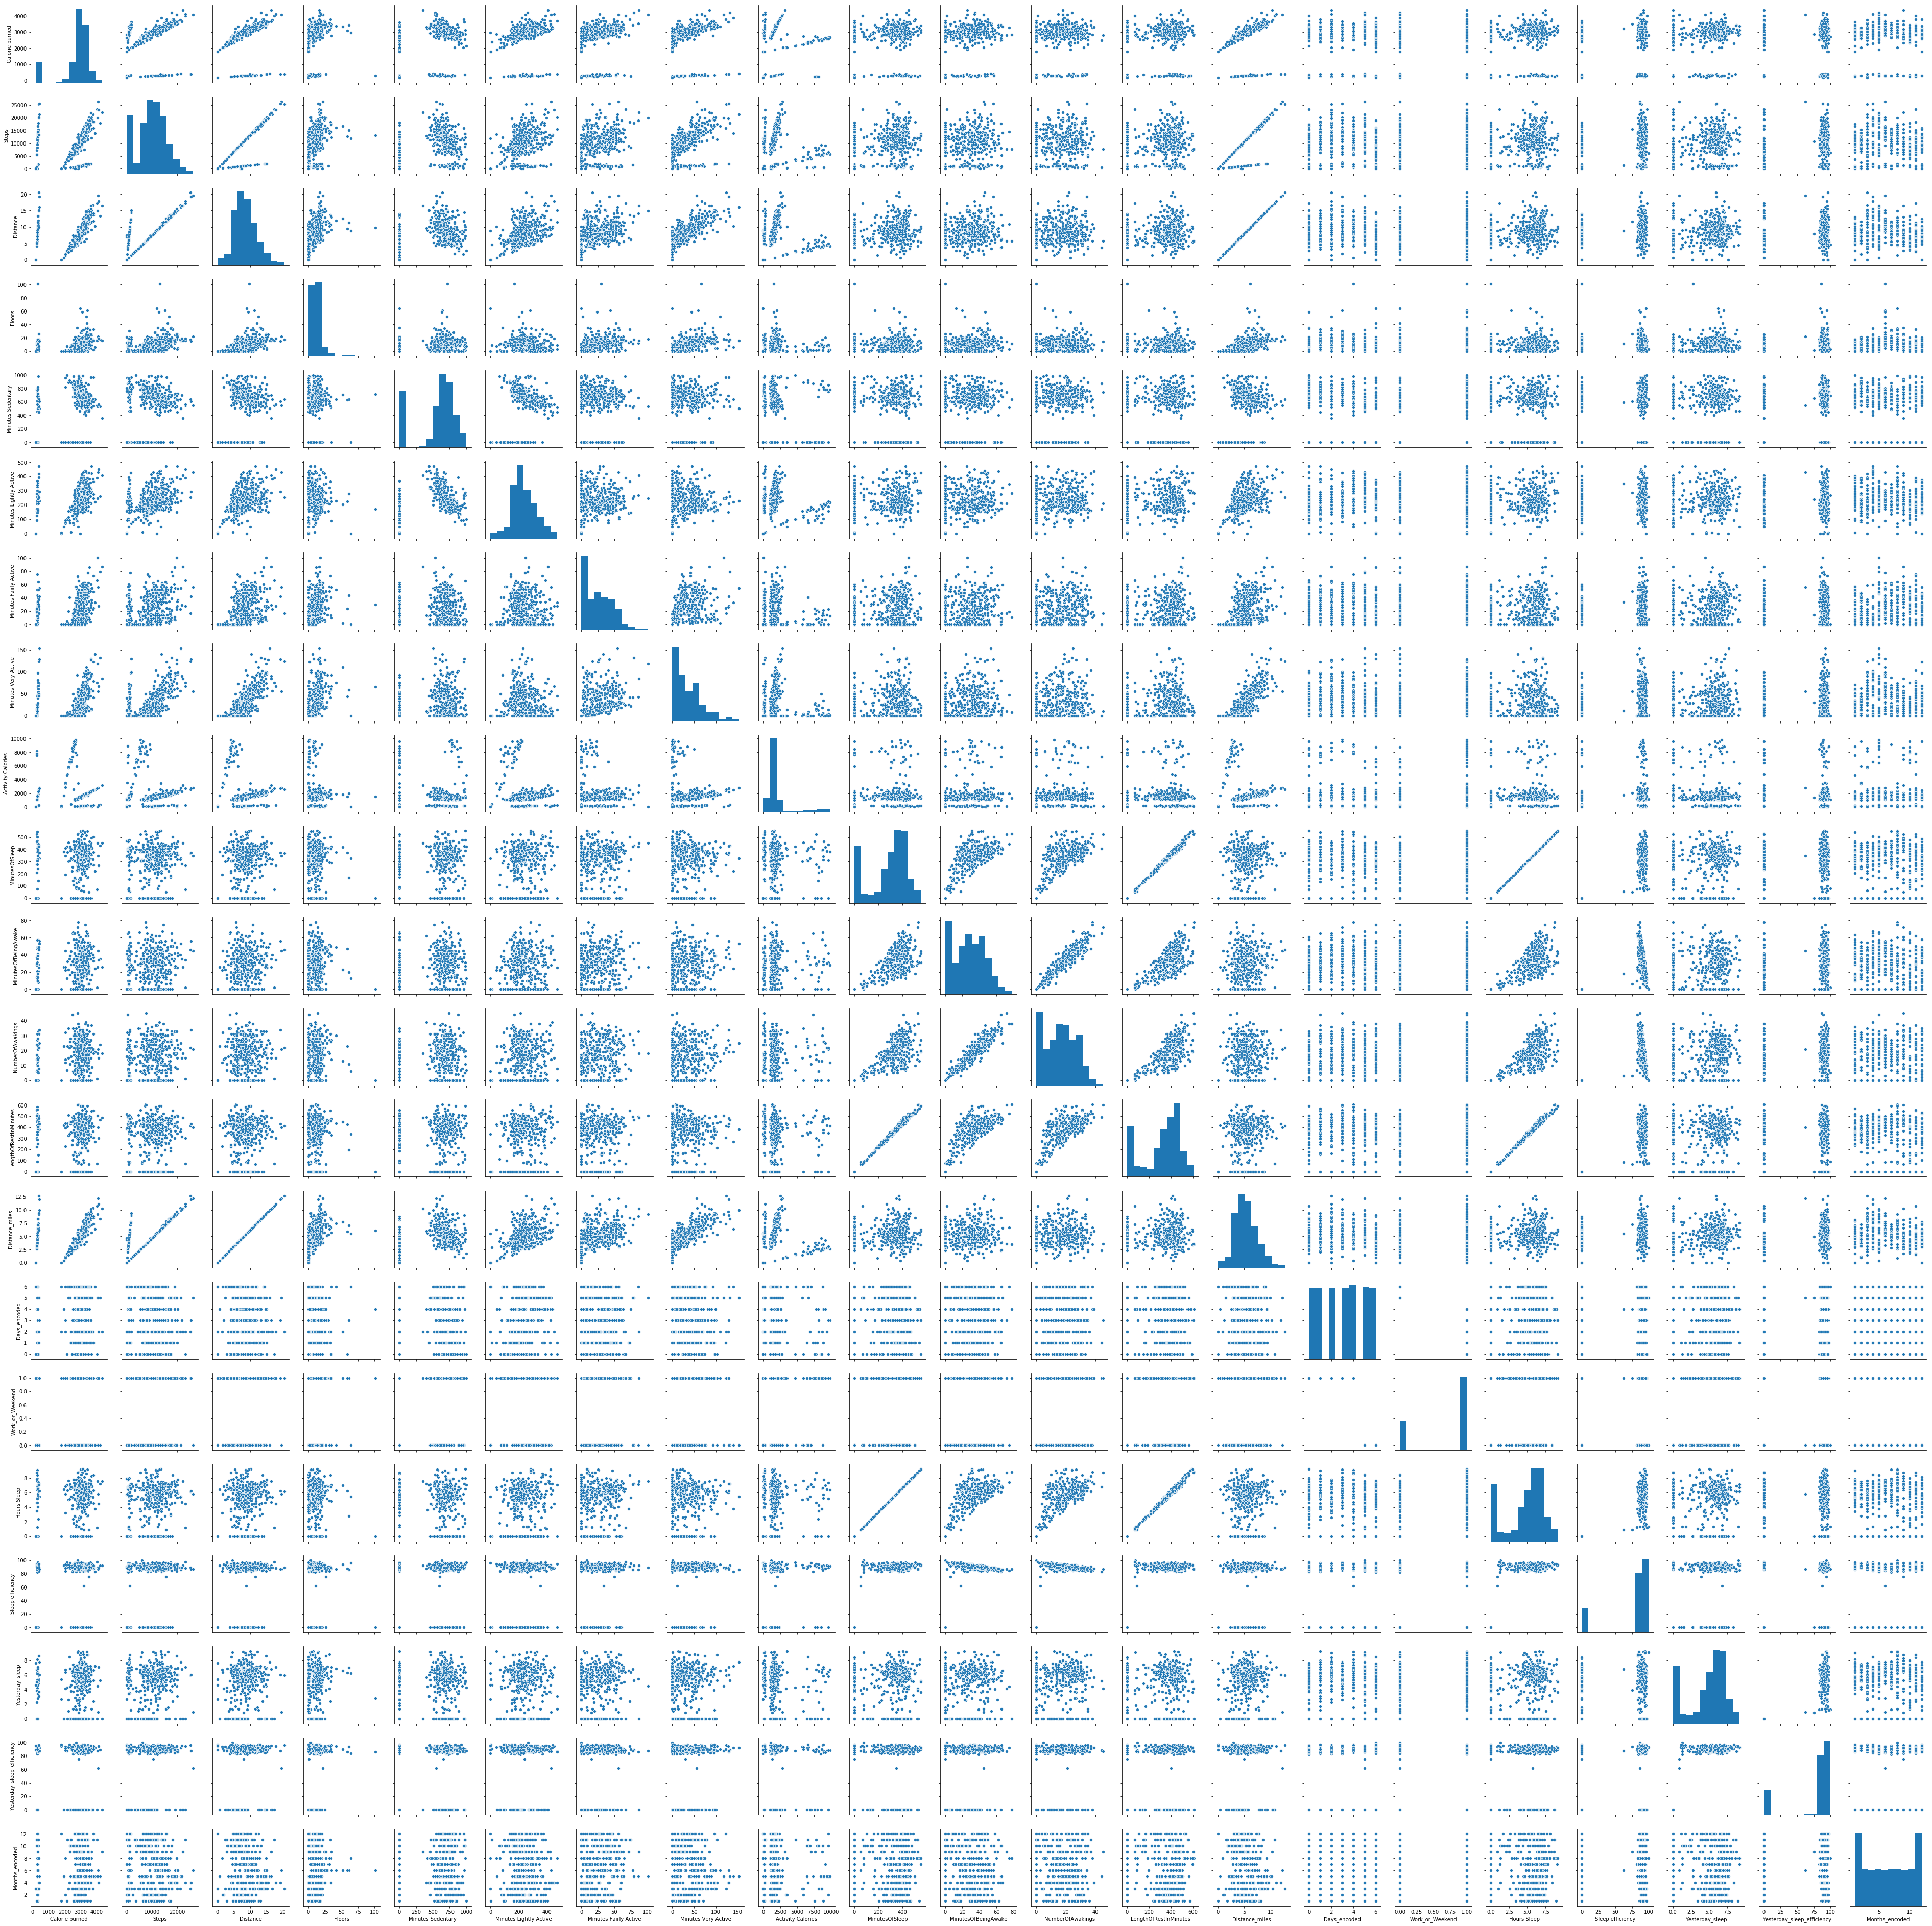

In [4]:
sns.pairplot(data)

Text(0, 0.5, 'NumberOfAwakings')

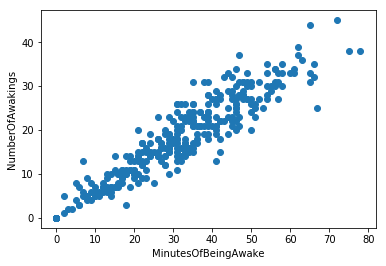

In [5]:
x = data['MinutesOfBeingAwake']
y = data['NumberOfAwakings']
fig, ax = plt.subplots(1,1)
plt.scatter(x,y)
plt.xlabel('MinutesOfBeingAwake')
plt.ylabel('NumberOfAwakings')

In [11]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
X = pd.DataFrame(data= data, columns=['MinutesOfBeingAwake'])
Y = pd.DataFrame(data= data, columns=['NumberOfAwakings'])
model = lm.fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("NumberOfAwakings ~MinutesOfBeingAwake",data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       NumberOfAwakings   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 11 Jul 2019   Prob (F-statistic):          1.89e-189
Time:                        16:32:50   Log-Likelihood:                -958.31
No. Observations:                 367   AIC:                             1921.
Df Residuals:                     365   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7290    

In [13]:
# R squared score
lm.score(X,Y)

0.9059552749155962

In [14]:
lm.intercept_

array([0.72898957])

In [15]:
lm.coef_

array([[0.55223862]])

In [16]:
#model.resid and #Y-predictions are same

In [17]:
predictions  = lm.predict(X)

In [9]:
Y

,NumberOfAwakings
0,23
1,21
2,25
3,21
4,44
5,31
6,12
7,16
8,18
9,11


In [18]:
comparisons = pd.DataFrame(np.column_stack([Y, predictions]), 
                               columns=['lst1Title', 'lst12'])
comparisons

,lst1Title,lst12
0,23.0,15.087194
1,21.0,20.057341
2,25.0,26.131966
3,21.0,17.848387
4,44.0,36.624500
5,31.0,26.684205
6,12.0,16.191671
7,16.0,19.505103
8,18.0,15.087194
9,11.0,10.117046


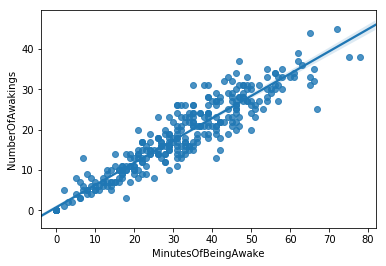

In [14]:
sns.regplot(x="MinutesOfBeingAwake", y="NumberOfAwakings", data=data)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y, predictions)
print(mse)

10.853805417037568


In [16]:
r2_score(Y, predictions)

0.9059552749155962

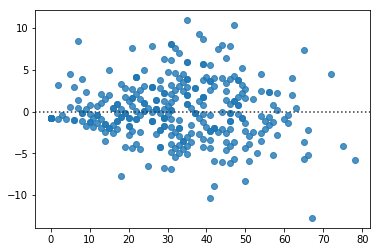

In [17]:
sns.residplot(X, Y)

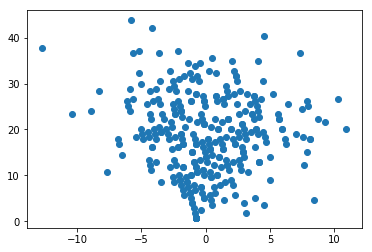

In [18]:
residuals = Y - predictions
plt.scatter(residuals,predictions)

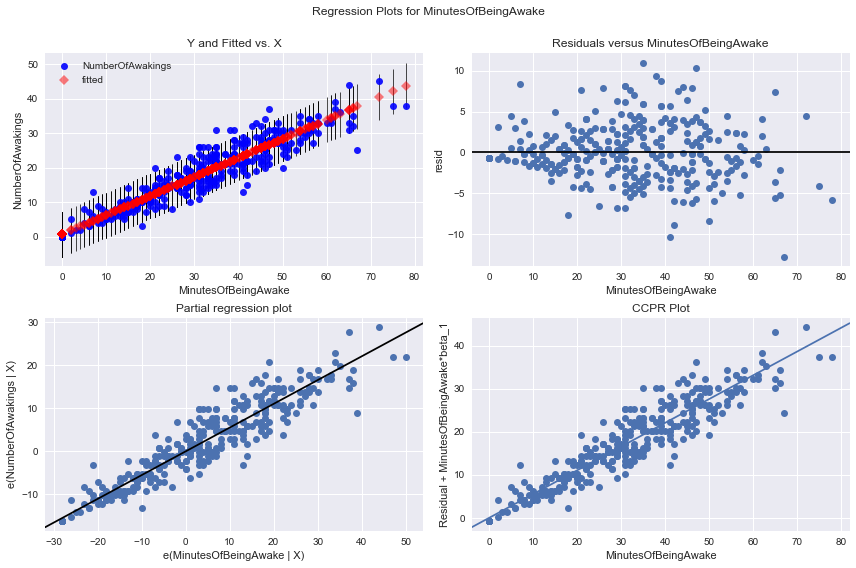

In [19]:
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "MinutesOfBeingAwake", fig=fig)

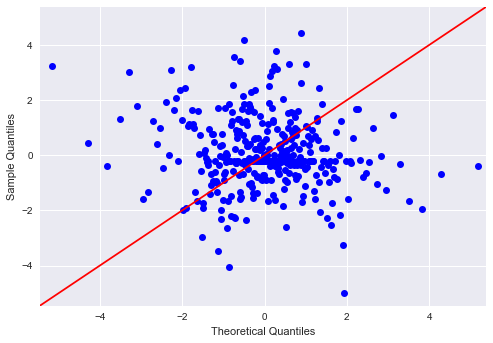

In [20]:
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
plt.show()

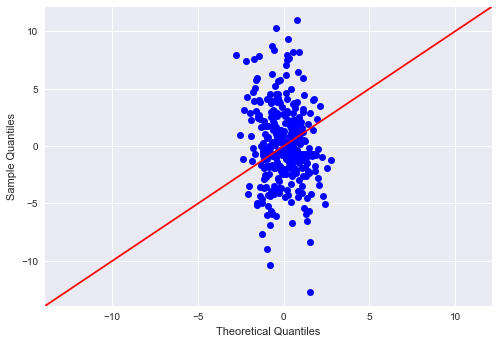

In [21]:
import numpy as np
import statsmodels.api as sm
import pylab

test = np.random.normal(0,1, 1000)

sm.qqplot(residuals, line='45')
pylab.show()

## Multiple Linear Regression
    

In [22]:
Y = pd.DataFrame(data = data, columns = ['NumberOfAwakings'])
#type(data['MinutesOfBeingAwake'])   # This is a pandas series
X = data[['MinutesOfBeingAwake', 'MinutesOfSleep', 'Activity Calories']]

In [23]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [24]:
# R squared score / Same as R2 score
lm.score(X,Y)

0.9099214780402995

In [25]:
lm.intercept_

array([-0.15950337])

In [26]:
lm.coef_

array([[5.07549506e-01, 6.85473448e-03, 7.28877511e-05]])

In [27]:
predictions  = lm.predict(X)

In [28]:
mse = mean_squared_error(Y, predictions)
print(mse)

10.396061541223801


In [29]:
r2_score(Y, predictions)

0.9099214780402995

### To get the summary from statmodels

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Y~X",data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 29 May 2019   Prob (F-statistic):          2.67e-189
Time:                        10:45:30   Log-Likelihood:                -950.40
No. Observations:                 367   AIC:                             1909.
Df Residuals:                     363   BIC:                             1924.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1595      0.399     -0.400      0.6

### ANOVA results 

In [31]:
from statsmodels.stats.anova import anova_lm
anova = anova_lm(model)
print(anova)

             df        sum_sq       mean_sq            F         PR(>F)
X           3.0  38540.520074  12846.840025  1222.272485  2.667877e-189
Residual  363.0   3815.354586     10.510619          NaN            NaN


## Scaling and Normalization/Standardization

In [28]:
from sklearn import preprocessing
data4 = data.copy()
x_scaled = preprocessing.scale(data['MinutesOfBeingAwake'].T)
# print(x_scaled[0:10])
x_scaled
# len(x_scaledz
max(x_scaled)
min(x_scaled)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


-1.5126359113246428

In [32]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data[['MinutesOfBeingAwake','MinutesOfSleep']])
scaled = transformer.transform(data[['MinutesOfBeingAwake','MinutesOfSleep']])
scaled

array([[0.06755366, 0.99771564],
       [0.07686444, 0.99704155],
       [0.11803217, 0.99300977],
       [0.09918692, 0.99506882],
       [0.15770661, 0.98748601],
       [0.11527574, 0.99333353],
       [0.07329316, 0.99731044],
       [0.12539639, 0.99210672],
       [0.05742719, 0.9983497 ],
       [0.0630712 , 0.99800903],
       [0.05381412, 0.99855097],
       [0.13463255, 0.99089559],
       [0.07748653, 0.9969934 ],
       [0.12994298, 0.99152147],
       [0.1013857 , 0.99484719],
       [0.08075392, 0.99673407],
       [0.10653312, 0.99430915],
       [0.        , 0.        ],
       [0.09975697, 0.99501183],
       [0.06286752, 0.99802188],
       [0.15632745, 0.98770528],
       [0.07521735, 0.99716716],
       [0.15951631, 0.98719529],
       [0.12575426, 0.99206142],
       [0.09491834, 0.99548506],
       [0.12143503, 0.99259938],
       [0.13964384, 0.9902018 ],
       [0.05404461, 0.99853852],
       [0.13565368, 0.99075632],
       [0.12575426, 0.99206142],
       [0.

In [29]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(data[['MinutesOfBeingAwake','MinutesOfSleep', 'Activity Calories']])
scaled_x = transformer.transform(data[['MinutesOfBeingAwake','MinutesOfSleep', 'Activity Calories']])
scaled_x

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.10845536,  0.6051483 , -0.17863623],
       [ 0.37760714,  1.05810151,  0.10000218],
       [ 0.97168352,  0.62456058, -0.15950437],
       ...,
       [ 0.37760714, -0.06781074,  0.10049274],
       [ 0.75565575,  0.51455766,  0.03328594],
       [ 1.56575991,  1.368698  , -0.21591883]])

In [35]:
model = ols("Y~scaled_x",data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 29 May 2019   Prob (F-statistic):          2.67e-189
Time:                        10:45:30   Log-Likelihood:                -950.40
No. Observations:                 367   AIC:                             1909.
Df Residuals:                     363   BIC:                             1924.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      16.1962      0.169     95.704      

In [36]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(data[['MinutesOfBeingAwake','MinutesOfSleep']])
transformer.transform(data[['MinutesOfBeingAwake','MinutesOfSleep']])

/Users/himanshuaggarwal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.33333333, 0.69439421],
       [0.44871795, 0.82097649],
       [0.58974359, 0.69981917],
       [0.3974359 , 0.56238698],
       [0.83333333, 0.73598553],
       [0.6025641 , 0.7323689 ],
       [0.35897436, 0.68896926],
       [0.43589744, 0.48643761],
       [0.33333333, 0.81735986],
       [0.21794872, 0.48643761],
       [0.11538462, 0.30198915],
       [0.64102564, 0.66546112],
       [0.38461538, 0.69801085],
       [0.58974359, 0.63471971],
       [0.41025641, 0.56781193],
       [0.44871795, 0.78119349],
       [0.30769231, 0.40506329],
       [0.        , 0.        ],
       [0.5       , 0.7034358 ],
       [0.30769231, 0.68896926],
       [0.84615385, 0.75406872],
       [0.44871795, 0.83905967],
       [0.67948718, 0.59312839],
       [0.69230769, 0.77034358],
       [0.52564103, 0.77757685],
       [0.58974359, 0.67992767],
       [0.56410256, 0.5641953 ],
       [0.26923077, 0.70162749],
       [0.71794872, 0.73960217],
       [0.69230769, 0.77034358],
       [0.

## To convert an individual column 

In [37]:
from sklearn.preprocessing import Normalizer
test = np.array(data['MinutesOfBeingAwake'])
test = test.reshape(1,-1)
transformer = Normalizer().fit(test)
transformer.transform(test)

array([[0.04042216, 0.05441445, 0.07151614, 0.04819566, 0.10105541,
        0.07307084, 0.04353156, 0.05285975, 0.04042216, 0.02642988,
        0.01399229, 0.07773493, 0.04664096, 0.07151614, 0.04975036,
        0.05441445, 0.03731277, 0.        , 0.06063325, 0.03731277,
        0.10261011, 0.05441445, 0.08239903, 0.08395373, 0.06374264,
        0.07151614, 0.06840674, 0.03264867, 0.08706312, 0.08395373,
        0.06374264, 0.07151614, 0.06840674, 0.03264867, 0.08706312,
        0.02798458, 0.06996144, 0.05130505, 0.03731277, 0.04508626,
        0.03575807, 0.03109397, 0.        , 0.02642988, 0.07618023,
        0.07307084, 0.07928963, 0.06529734, 0.07462553, 0.06063325,
        0.08395373, 0.03731277, 0.04508626, 0.05907855, 0.02487518,
        0.05907855, 0.06996144, 0.06529734, 0.03420337, 0.04042216,
        0.03264867, 0.02953927, 0.06840674, 0.08861782, 0.02953927,
        0.01554699, 0.06063325, 0.01865638, 0.08084433, 0.04819566,
        0.03420337, 0.04508626, 0.03731277, 0.03

## Handling Categorical Variables

### Label Encoding 

In [38]:
x = pd.Categorical(data['Months']).codes
print(x)

[ 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7

In [39]:
data2 = data.copy()
data2['Months'] = pd.Categorical(data['Months']).codes
data2['Days'] = pd.Categorical(data['Days']).codes

In [40]:
## if we see the below output, this conversion is called label encoding 

In [41]:
data2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,0,4.0,1,6.400000,92.086331,0.000000,0.000000,8,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,2,5.0,0,7.566667,92.464358,6.400000,92.086331,8,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,3,6.0,0,6.450000,88.761468,7.566667,92.464358,8,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,1,0.0,1,5.183333,88.857143,6.450000,88.761468,8,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,5,1.0,1,6.783333,82.892057,5.183333,88.857143,8,5


In [42]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()
data2["Days"] = labels.fit_transform(data["Days"])
data2["Days"].head(11)

0     0
1     2
2     3
3     1
4     5
5     6
6     4
7     0
8     2
9     3
10    1
Name: Days, dtype: int64

## One Hot Encoding

In [43]:
data3 = data.copy()
pd.get_dummies(data3, columns=["Days"]).head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Yesterday_sleep_efficiency,Months,Months_encoded,Days_Friday,Days_Monday,Days_Saturday,Days_Sunday,Days_Thursday,Days_Tuesday,Days_Wednesday
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.000000,May,5,1,0,0,0,0,0,0
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,92.086331,May,5,0,0,1,0,0,0,0
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,92.464358,May,5,0,0,0,1,0,0,0
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,88.761468,May,5,0,1,0,0,0,0,0
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,88.857143,May,5,0,0,0,0,0,1,0


# Logistic Regression

## binary classification

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
churnData = pd.read_csv('/Users/himanshuaggarwal/Ironhack-Python-Files/DATA/Customer-Churn.csv')
#churnData.head(5)
churnData.dtypes
churnData.shape

(7043, 21)

In [46]:
#churnData['SeniorCitizen'] = churnData['SeniorCitizen'].astype('float32')
#churnData['tenure'] = churnData['tenure'].astype('float32')

In [50]:
numericData = churnData[['tenure', 'SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(churnData[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(churnData[['tenure','SeniorCitizen','MonthlyCharges']])

/Users/himanshuaggarwal/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/himanshuaggarwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [33]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, churnData['Churn'])

NameError: name 'LogisticRegression' is not defined

In [56]:
classification.score(scaled_x, churnData['Churn'])

0.7911401391452506

In [57]:
type(churnData['Churn'])

pandas.core.series.Series